# Gender Classification from names

## Edit dataset

In [64]:
import pandas as pd

GenderData = pd.read_csv('KGGenderDataset.csv', usecols=[0,1])
GenderData.head()

,CustomerName,Gender
0,GERALL OWEN,M
1,Mardatomi Maselta,M
2,Stefanus Suyono,M
3,Mohamad Iwan Cahyadi,M
4,HKF Official,F


In [65]:
GenderData.dtypes

CustomerName    object
Gender          object
dtype: object

In [66]:
GenderData.isna().sum() #lihat jika ada null value

CustomerName    1
Gender          8
dtype: int64

In [67]:
GenderData = GenderData.dropna() #drop null value

In [68]:
GenderData.isna().sum() #check lagi ada null value

CustomerName    0
Gender          0
dtype: int64

In [69]:
# Function to split names
def split_name(name):

    name = name.lower()
    parts = name.split()
    
    # Initialize the result as empty strings for all parts
    first_name = second_name = third_name = fourth_name = last_name = ' '
    
    if len(parts) >= 1:
        first_name = parts[0]  # First name
    if len(parts) >= 2:
        second_name = parts[1]  # Second name
    if len(parts) >= 3:
        third_name = parts[2]  # Third name
    if len(parts) >= 4:
        fourth_name = parts[3]  # Fourth name
    if len(parts) >= 5:
        # If more than 4 parts, concatenate all additional names to LastName
        last_name = ' '.join(parts[4:])
    
    return pd.Series([first_name, second_name, third_name, fourth_name, last_name])
        
# Apply function to the DataFrame
GenderData[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']] = GenderData['CustomerName'].apply(split_name)

In [70]:
GenderData.head(20)

,CustomerName,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,GERALL OWEN,M,gerall,owen,,,
1,Mardatomi Maselta,M,mardatomi,maselta,,,
2,Stefanus Suyono,M,stefanus,suyono,,,
3,Mohamad Iwan Cahyadi,M,mohamad,iwan,cahyadi,,
4,HKF Official,F,hkf,official,,,
5,Rizky Bramantyo,M,rizky,bramantyo,,,
6,Enya grace,F,enya,grace,,,
7,nhia pram,F,nhia,pram,,,
8,Sintya Handayani,F,sintya,handayani,,,
9,Aril Al Kautsar,M,aril,al,kautsar,,


In [56]:
GenderData.isna().sum() #check null value

CustomerName    0
Gender          0
FirstName       0
SecondName      0
ThirdName       0
FourthName      0
LastName        0
dtype: int64

In [57]:
GenderData = GenderData.drop('CustomerName', axis=1) #drop column CustomerName

In [58]:
GenderData.head(40)

,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,M,gerall,owen,,,
1,M,mardatomi,maselta,,,
2,M,stefanus,suyono,,,
3,M,mohamad,iwan,cahyadi,,
4,F,hkf,official,,,
5,M,rizky,bramantyo,,,
6,F,enya,grace,,,
7,F,nhia,pram,,,
8,F,sintya,handayani,,,
9,M,aril,al,kautsar,,


In [71]:
GenderData['Gender'] = GenderData['Gender'].str.upper()

In [72]:
print(GenderData['Gender'].value_counts())

Gender
F           21101
M           15835
PURWANTO        1
Name: count, dtype: int64


In [73]:
GenderData = GenderData[GenderData['Gender'] != 'PURWANTO']

In [74]:
print(GenderData['Gender'].value_counts())

Gender
F    21101
M    15835
Name: count, dtype: int64


In [75]:
GenderData.to_csv("KGGenderDatasetClean.csv", index=False) #save clean dataset

## Random Forest

In [15]:
import pandas as pd

GenderData = pd.read_csv('KGGenderDatasetClean.csv')
GenderData.head()

,Gender,FirstName,SecondName,ThirdName,FourthName,LastName
0,M,gerall,owen,,,
1,M,mardatomi,maselta,,,
2,M,stefanus,suyono,,,
3,M,mohamad,iwan,cahyadi,,
4,F,hkf,official,,,


### preprocess data

In [16]:
from sklearn.model_selection import train_test_split

# Function to extract bi-grams from a name
def get_bigrams(name):
    return tuple(name[i:i+2] for i in range(len(name)-1)) if isinstance(name, str) else ("",)

# Apply bi-gram tokenization to all name columns
X = GenderData[['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']].astype(str)
X = X.map(get_bigrams)  

# Convert to categorical type
for col in X.columns:
    X[col] = X[col].astype("category")

# Encode y: M → 0, F → 1
y = GenderData['Gender'].map({'M': 0, 'F': 1})

# Splitting the dataset (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Print example data
print("Example of tokenized and categorized X_train:")
print(X_train.head())

print("\nExample of encoded y_train:")
print(y_train.head())


Example of tokenized and categorized X_train:
                  FirstName                            SecondName ThirdName  \
7140   (he, en, nd, dr, ra)      (ni, ik, ki, ij, ju, ul, lu, uw)        ()   
1800       (be, en, nn, ny)  (an, ng, gg, ga, ar, rb, bi, it, to)     (s.,)   
24787      (ha, as, sn, na)                                    ()        ()   
6105       (wa, aw, wa, an)          (se, et, ty, ya, aw, wa, an)        ()   
29028      (nu, ur, ru, ul)                      (ih, hs, sa, an)        ()   

      FourthName LastName  
7140          ()       ()  
1800          ()       ()  
24787         ()       ()  
6105          ()       ()  
29028         ()       ()  

Example of encoded y_train:
7140     0
1800     0
24787    1
6105     0
29028    1
Name: Gender, dtype: int64


### Algorithm

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from collections import Counter
from random import sample

class CHAIDTree:
    def __init__(self, min_samples_split=10, significance_level=0.05):
        self.min_samples_split = min_samples_split
        self.significance_level = significance_level
        self.tree = None  # Tree structure will be stored here

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y):
        if len(y) < self.min_samples_split or len(set(y)) == 1:
            return Counter(y).most_common(1)[0][0]  # Return majority class

        best_split = self._find_best_split(X, y)
        if best_split is None:
            return Counter(y).most_common(1)[0][0]  # No valid split found
        
        feature, groups = best_split
        node = {"feature": feature, "children": {}}

        for category, (X_sub, y_sub) in groups.items():
            node["children"][category] = self._build_tree(X_sub, y_sub)

        return node

    def _find_best_split(self, X, y):
        best_feature = None
        best_p_value = float("inf")
        best_groups = None

        for feature in X.columns:
            categories = X[feature].unique()
            contingency_table = np.array([[(y[X[feature] == cat] == 0).sum(), 
                                           (y[X[feature] == cat] == 1).sum()] 
                                          for cat in categories])
            
            chi2, p, _, _ = chi2_contingency(contingency_table, correction=False)
            
            if p < self.significance_level and p < best_p_value:
                best_feature = feature
                best_p_value = p
                best_groups = {cat: (X[X[feature] == cat], y[X[feature] == cat]) for cat in categories}

        return (best_feature, best_groups) if best_feature else None

    def predict_sample(self, sample, node, y):
        if isinstance(node, (int, np.int64)):  # Leaf node
            return node
        feature = node["feature"]
        value = sample.get(feature, None)
        return self.predict_sample(sample, node["children"].get(value, Counter(y).most_common(1)[0][0]), y)

    def predict(self, X, y):
        return np.array([self.predict_sample(sample, self.tree, y) for _, sample in X.iterrows()])


class RandomForestCHAID:
    def __init__(self, n_trees=100, sample_size=0.8, min_samples_split=10, significance_level=0.05, max_features="sqrt"):
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.min_samples_split = min_samples_split
        self.significance_level = significance_level
        self.max_features = max_features  # Feature bagging method
        self.trees = []
        self.selected_features = []  # Track selected features per tree

    def fit(self, X, y):
        n_samples = int(self.sample_size * len(X))
        n_features = self._calculate_n_features(X)  # Determine number of features per tree

        for _ in range(self.n_trees):
            # Bootstrap sample the dataset
            X_sample, y_sample = resample(X, y, n_samples=n_samples, random_state=None)

            # Feature Bagging: Select a random subset of features
            selected_features = tuple(sample(list(X.columns), n_features))
            self.selected_features.append(selected_features)  

            # Train a CHAID Decision Tree using only the selected features
            tree = CHAIDTree(min_samples_split=self.min_samples_split, significance_level=self.significance_level)
            tree.fit(X_sample[list(selected_features)], y_sample)  

            self.trees.append(tree)

    def _calculate_n_features(self, X):
        """ Determines number of features to use for feature bagging """
        if self.max_features == "sqrt":
            return max(1, int(np.sqrt(len(X.columns))))
        elif self.max_features == "log2":
            return max(1, int(np.log2(len(X.columns))))
        elif isinstance(self.max_features, int):
            return min(len(X.columns), self.max_features)
        else:
            return len(X.columns)  # Default: Use all features (no feature bagging)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X[list(features)], y_train) 
                               for tree, features in zip(self.trees, self.selected_features)])

        # Majority Voting
        final_preds = [Counter(tree_preds[:, i]).most_common(1)[0][0] for i in range(X.shape[0])]
        return np.array(final_preds)


# Train Random Forest CHAID with Feature Bagging
rf = RandomForestCHAID(n_trees=100, sample_size=0.8, max_features="sqrt")  # Use sqrt(feature count)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Random Forest CHAID Accuracy:", accuracy_score(y_test, y_pred))


## ANN

### preprocessing data

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
GenderData = pd.read_csv('KGGenderDatasetClean.csv')

# Extract all unique names across columns
name_columns = ['FirstName', 'SecondName', 'ThirdName', 'FourthName', 'LastName']
all_names = set(GenderData[name_columns].values.flatten())

# Create a vocabulary (name → index)
name_to_index = {name: i for i, name in enumerate(all_names)}

# Hyperparameters
embedding_dim = 32  # Size of each embedding vector
vocab_size = len(name_to_index)

# Initialize embedding matrix
embedding_matrix = np.random.rand(vocab_size, embedding_dim)

# Function to encode names
def encode_names(X):
    encoded_features = []
    
    for _, row in X.iterrows():
        name_embeddings = []
        
        for name in row:
            if name in name_to_index:
                name_embeddings.append(embedding_matrix[name_to_index[name]])
            else:
                name_embeddings.append(np.zeros(embedding_dim))  # Use zero vector if name is missing
                
        encoded_features.append(np.concatenate(name_embeddings, axis=0))
    
    return np.array(encoded_features)

# Encode X using word embeddings
X = GenderData[name_columns].astype(str)
X_encoded = encode_names(X)

# Encode y: M → 0, F → 1
y = GenderData['Gender'].map({'M': 0, 'F': 1}).values

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20)

print("Example of encoded X_train:")
print(X_train[:5])  # Prints first 5 samples

print("Example of encoded Y_train:")
print(y_train[:5])  # Prints first 5 samples

Example of encoded X_train:
[[0.56450396 0.26127412 0.07281964 0.45101708 0.38711532 0.35600034
  0.83655443 0.23145611 0.38270476 0.56421327 0.77915738 0.02128906
  0.67670167 0.2577599  0.27340136 0.59062641 0.15721654 0.19751751
  0.89641982 0.98609111 0.76227636 0.20108501 0.48507913 0.17821283
  0.41513789 0.22314803 0.2937184  0.9223295  0.05457922 0.18158177
  0.81492666 0.28918109 0.80520335 0.34997952 0.17729165 0.25680189
  0.29143606 0.71895014 0.0864289  0.48632323 0.44125194 0.89028806
  0.58149005 0.38780128 0.89778967 0.07096306 0.886392   0.38762187
  0.32615489 0.76218575 0.12577777 0.79534752 0.4593022  0.09252045
  0.82213095 0.35881424 0.21520333 0.0301911  0.40013089 0.9557263
  0.79575252 0.39744895 0.41778507 0.84268172 0.96921961 0.46664435
  0.40181975 0.51226205 0.58589256 0.85119862 0.04935494 0.50004166
  0.90561922 0.78457189 0.94690968 0.41571466 0.55188626 0.74190947
  0.07127634 0.61209142 0.41619405 0.88791956 0.16809274 0.8194851
  0.77219365 0.5141478

In [98]:
input_size = X_train.shape
print(input_size)

(29548, 40)


### algorithm (belum selesai)

Epoch 0, Loss: 0.244875
Epoch 1, Loss: 0.244721
Epoch 2, Loss: 0.244713
Epoch 3, Loss: 0.244712
Epoch 4, Loss: 0.244712
train Metrics: {'accuracy': 0.5727291187220793, 'precision': 0.5727291187220793, 'recall': 1.0, 'f1_score': 0.7283251920552603, 'roc_auc': 0.5163760211511312}


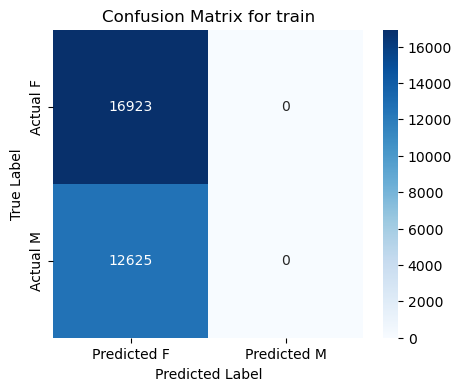

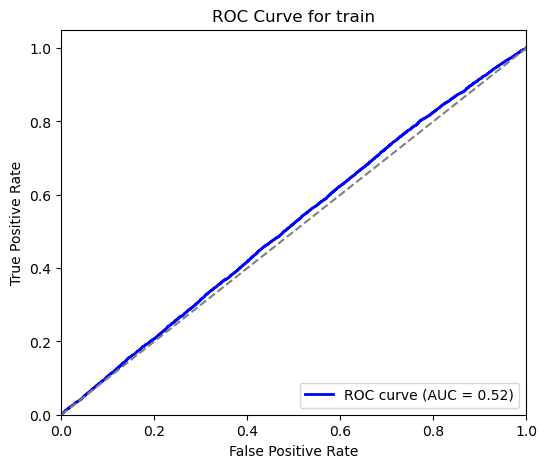

test Metrics: {'accuracy': 0.565511640498105, 'precision': 0.565511640498105, 'recall': 1.0, 'f1_score': 0.7224623897630987, 'roc_auc': 0.5086025077210548}


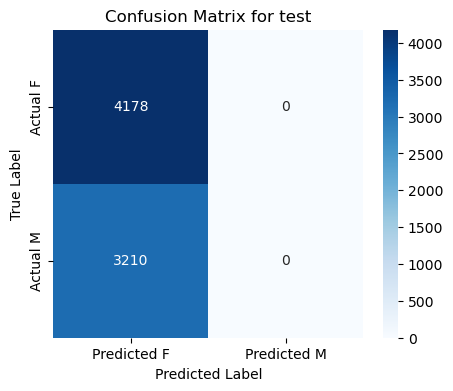

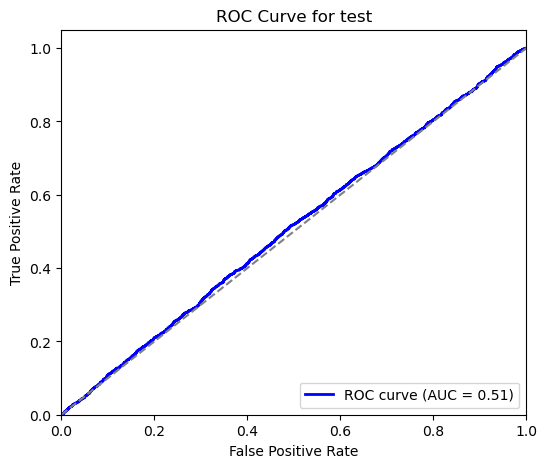

In [101]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.num_hidden_layers = len(hidden_sizes)
        
        # Initialize weights and biases for hidden layers
        self.weights = []
        self.biases = []
        
        # Input to first hidden layer
        self.weights.append(np.random.randn(input_size, hidden_sizes[0]) * 0.01)
        self.biases.append(np.zeros((1, hidden_sizes[0])))
        
        # Hidden layers
        for i in range(len(hidden_sizes) - 1):
            self.weights.append(np.random.randn(hidden_sizes[i], hidden_sizes[i+1]) * 0.01)
            self.biases.append(np.zeros((1, hidden_sizes[i+1])))
        
        # Last hidden layer to output
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size) * 0.01)
        self.biases.append(np.zeros((1, output_size)))
    
    def forward(self, X):
        self.activations = [X]
        self.z_values = []
        
        for i in range(self.num_hidden_layers):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            self.activations.append(relu(z))
        
        # Output layer
        z_output = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.z_values.append(z_output)
        output = sigmoid(z_output)
        self.activations.append(output)
        
        return output
    
    def backward(self, X, y, learning_rate):
        for i in range(X.shape[0]):  # Stochastic Gradient Descent (SGD)
            x_sample = X[i:i+1]
            y_sample = y[i:i+1]
            
            # Forward pass
            output = self.forward(x_sample)
            
            # Compute errors
            output_error = y_sample - output
            deltas = [output_error * sigmoid_derivative(output)]
            
            # Backpropagate through hidden layers
            for j in range(self.num_hidden_layers, 0, -1):
                error = deltas[-1].dot(self.weights[j].T)
                delta = error * relu_derivative(self.activations[j])
                deltas.append(delta)
            
            deltas.reverse()
            
            # Update weights and biases
            for j in range(len(self.weights)):
                self.weights[j] += self.activations[j].T.dot(deltas[j]) * learning_rate
                self.biases[j] += np.sum(deltas[j], axis=0, keepdims=True) * learning_rate
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - self.forward(X)))  # Mean Squared Error (MSE)
            print(f'Epoch {epoch}, Loss: {loss:.6f}')

# Create and train the Neural Network
input_size = X_train.shape[1]  # Match number of features
hidden_sizes = [512, 128, 64, 32, 16]  # Five hidden layers
nn = NeuralNetwork(input_size=input_size, hidden_sizes=hidden_sizes, output_size=1)

# Train the neural network
nn.train(X_train, y_train, epochs=5, learning_rate=0.001)

# Evaluate on training data
evaluate_model(nn, X_train, y_train, "train")

# Evaluate on testing data
evaluate_model(nn, X_test, y_test, "test")
